# ML in Life Sciences - Class 5: End-to-End Machine Learning Project

**Semester:** 2024.2

---
This notebook is part of the crash course "Machine Learning in Life Sciences" aimed at graduate students in biological sciences.

---
**Prof.** Ignacio Sánchez-Gendriz

**Date:** September 11, 2024

[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1XHDxwpcg2-fSEek4fs6eMVowwehMpCb-?authuser=1)


## Introduction

In this section, we will analyze a dataset containing length measurements for four species of shrimp:

1. **FB:** *Farfantepenaeus brasiliensis* (F. brasiliensis)
2. **FI:** *Farfantepenaeus isabelae* (F. isabelae)
3. **FP:** *Farfantepenaeus paulensis* (F. paulensis)
4. **FS:** *Farfantepenaeus subtilis* (F. subtilis)

### Main Objective

Develop ML classifiers to automatically differentiate between the analyzed shrimp species.

### Specific Objectives

1. **Load and Clean Data:** Import the dataset and perform necessary cleaning to handle missing values, outliers, and inconsistencies.
2. **Explore and Visualize Data:** Conduct exploratory data analysis (EDA) to understand data distribution and uncover patterns.
3. **Prepare Data for Machine Learning:** Preprocess the data through feature engineering, scaling, and encoding as needed for machine learning algorithms.
4. **Select and Train Models:** Identify suitable classification models, train them, and evaluate their initial performance.
5. **Model Selection:** Compare the performance of trained models using appropriate metrics to select the best-performing model.
6. **Fine-Tune the Model:** Optimize the selected model’s hyperparameters to improve accuracy and robustness.
7. **Present the Results:** Summarize the findings, interpret the model's performance, and discuss its potential applications.


Here's a revised version of the text section:

---

## Material and Methods

### Dataset

The dataset consists of measurements from 164 individuals. For each individual, the cephalothorax length (standard length - $CC$) was measured. Additionally, the sulcus length (CS) and five distances ($P_1, P_2, P_3, P_4, P_5$) were measured for each groove (adrostral - abbreviated as ad; abdominal - abbreviated as AB).

To normalize the measurements and minimize the effect of individual size, all measurements were divided by the cephalothorax length ($CC$). This normalization step aimed to preserve the relative proportions of the distances.

The images below illustrate the measurements captured in the dataset that will be analyzed.

### Image 1
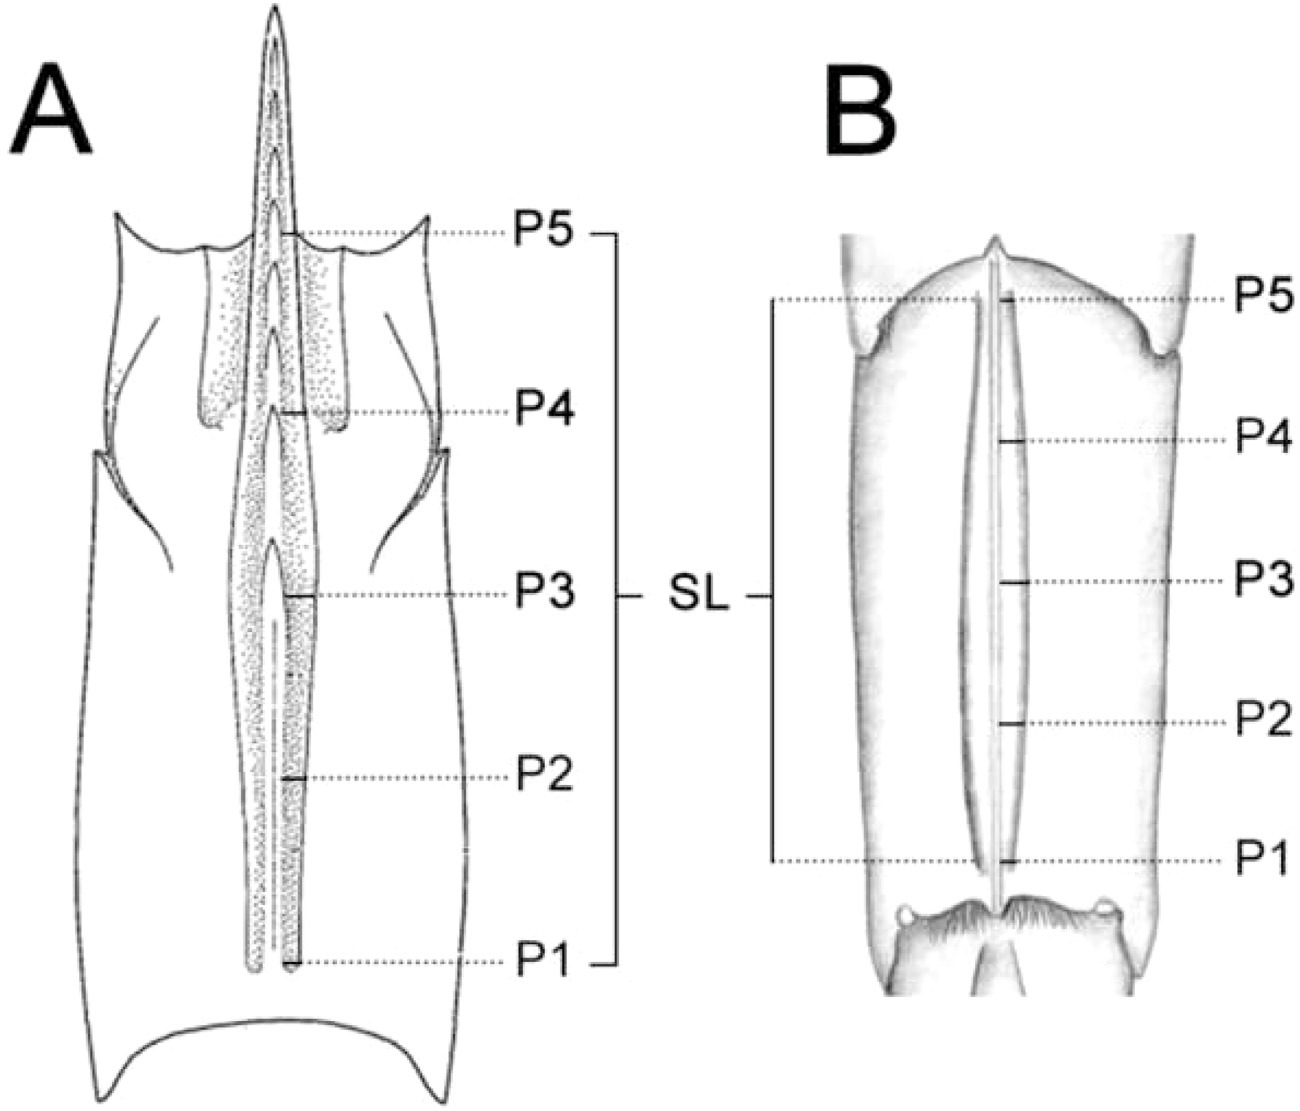

### Image 2

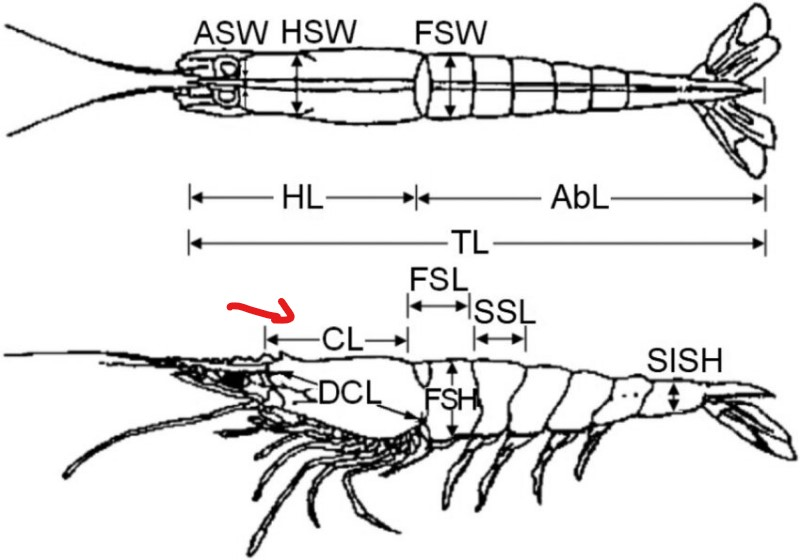

## Loading, Cleaning and Preprocessing the dataset

In [ ]:
# Step 1: Import necessary libraries (general ones)
import numpy as np
import pandas as pd

# Step 2: Import necessary libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns

In [ ]:
# Set Seaborn style and context for academic plots
sns.set_style("whitegrid", {'grid.linestyle': '--'})  # White background with dashed grid lines
sns.set_context("paper")  # Adjust context to "talk" or "poster" for presentations

# Enable TeX mode for high-quality text rendering
mpl.rcParams['font.family'] = 'serif'

# Configure legend aesthetics
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "black"
mpl.rcParams['legend.framealpha'] = 1  # Full opacity for better readability

# Adjust figure size for clarity
plt.rcParams['figure.figsize'] = [8, 6]  # Width, height in inches

# Configure axes spines
plt.rcParams['axes.edgecolor'] = 'black'  # Set the border of the axes to black
plt.rcParams['axes.linewidth'] = 0.5  # Set the width of the axes border

In [ ]:
# Loading the dataset
df_raw = pd.read_csv('Shrimp_Length_Raw.csv')
df_raw.head()

,SP,CC,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
0,FB,24.55,11.86,0.18,0.32,0.55,0.48,0.52,22.65,0.35,0.48,0.88,0.59,0.25
1,FB,19.05,9.09,0.21,0.36,0.46,0.54,0.48,17.75,0.33,0.44,0.68,0.52,0.25
2,FB,21.58,9.38,0.30,0.38,0.42,0.42,0.36,20.20,0.38,0.66,0.79,0.59,0.33
3,FB,17.95,9.35,0.26,0.38,0.53,0.44,0.29,16.61,0.28,0.45,0.57,0.44,0.24
4,FB,16.85,8.37,0.17,0.26,0.33,0.27,0.26,16.08,0.29,0.38,0.53,0.34,0.25


In [ ]:
# Preprocessing the dataset
# Divide each feature in df_raw.iloc[:, 2:] by the cephalothorax length (CC) located in df_raw.iloc[:, 1]
df_preprocessed = df_raw.copy()
df_preprocessed.iloc[:, 2:] = df_raw.iloc[:, 2:].div(df_raw.iloc[:, 1], axis=0)

# Drop column CC
df_preprocessed.drop(columns=['CC'], inplace=True)

# Display the first few rows of the preprocessed DataFrame
df_preprocessed.head()

,SP,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
0,FB,0.483096,0.007332,0.013035,0.022403,0.019552,0.021181,0.922607,0.014257,0.019552,0.035845,0.024033,0.010183
1,FB,0.477165,0.011024,0.018898,0.024147,0.028346,0.025197,0.931759,0.017323,0.023097,0.035696,0.027297,0.013123
2,FB,0.434662,0.013902,0.017609,0.019462,0.019462,0.016682,0.936052,0.017609,0.030584,0.036608,0.027340,0.015292
3,FB,0.520891,0.014485,0.021170,0.029526,0.024513,0.016156,0.925348,0.015599,0.025070,0.031755,0.024513,0.013370
4,FB,0.496736,0.010089,0.015430,0.019585,0.016024,0.015430,0.954303,0.017211,0.022552,0.031454,0.020178,0.014837


*Note*: I will create a split of the dataset the will have suffient samples in test set, in relation to train set (60 - 40 split), becuuse I will likt yo have a stric test classier performance. Also I will like to test data augmentation in train test (as for example smote).


In [ ]:
# Split the dataset

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_preprocessed, test_size=0.3, random_state=42)#, stratify=df_preprocessed['SP'])

print(f"Training set size: {len(train_set)}. Representing {(len(train_set)/len(df_preprocessed)*100):.2f} %")
print(f"Test set size: {len(test_set)}. Representing {(len(test_set)/len(df_preprocessed)*100):.2f} %")

# Note I will create a split with a

Training set size: 114. Representing 69.51 %
Test set size: 50. Representing 30.49 %


In [ ]:
# see data distribuition for train
train_set.describe()

,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.506905,0.008398,0.012646,0.016559,0.013734,0.011224,0.915301,0.009620,0.015729,0.025224,0.018260,0.009762
std,0.077227,0.002446,0.004069,0.005291,0.005423,0.005152,0.032995,0.004284,0.005745,0.006333,0.003686,0.002819
min,0.352012,0.003133,0.004781,0.006967,0.004810,0.002608,0.814165,0.002526,0.004683,0.011648,0.010399,0.003374
25%,0.451408,0.006763,0.010409,0.013254,0.010687,0.008141,0.892160,0.005925,0.010125,0.020163,0.016008,0.007969
50%,0.496715,0.008274,0.012596,0.016411,0.013116,0.010512,0.916969,0.009028,0.016802,0.025687,0.018004,0.009823
75%,0.551869,0.009515,0.015246,0.019320,0.016171,0.013774,0.939467,0.012635,0.020060,0.030034,0.020205,0.011415
max,0.755324,0.015237,0.022249,0.029526,0.028346,0.025537,0.981516,0.019617,0.030171,0.038026,0.029557,0.016110


### Analysis of Scale Differences:

1. **Feature Ranges and Means:**
   - The features `CSab`, `P1ab`, `P2ab`, `P3ab`, `P4ab`, and `P5ab` have mean values that range from approximately 0.008 to 0.506, with `CSab` being notably larger in scale compared to the `P` features.
   - The `CSad` feature has a mean of around 0.915, which is substantially larger than the means of the other features.
   
2. **Standard Deviation and Spread:**
   - The standard deviations (`std`) reflect the spread of each feature, with `CSab` and `CSad` having larger variations compared to the `P` features. `CSad` particularly shows a larger spread (`std` = 0.032995) compared to the others.
   
3. **Range Differences:**
   - The maximum values also highlight differences in scales, with `CSab` reaching up to 0.755 and `CSad` reaching up to 0.981, while the `P` features remain below 0.04.

### Recommendation:

Given the scale differences, particularly between `CSad`, `CSab`, and the `P` features, it is essential to apply scaling or normalization to ensure consistency and improve model performance. Here’s why:

- **Consistency Across Features:** Scaling ensures that all features contribute equally to the model, especially in algorithms that are sensitive to feature scales, such as SVM and k-NN. Without scaling, features on larger scales can disproportionately influence the model, leading to biased results.

- **Improved Model Performance:** Scaling helps many machine learning algorithms converge faster and perform better by ensuring that feature values are on a comparable scale. This reduces the likelihood of the model becoming biased toward features with larger ranges.

- **Handling Outliers and Zero-Centered Data Needs:** While Min-Max Scaling (0-1 normalization) adjusts data to a specific range, it can be adversely affected by outliers, skewing the distribution and causing typical values to cluster at lower ranges. For models like Artificial Neural Networks (ANNs) that perform better with zero-mean data, Standard Scaling (z-score normalization) is often a better choice as it centers the data around zero and scales it to unit variance.

### Suggested Scaling Method:

**Standard Scaling (Z-score normalization):** Given the considerations, Standard Scaling is recommended because it mitigates the impact of outliers and better aligns with models that require zero-centered data. This method scales features based on the mean and standard deviation, making it more robust to variations and enhancing the overall model performance.

### Final Thoughts:

Switching to Standard Scaling will align feature scales, reduce the impact of outliers, and better suit models that benefit from data centered around zero. This approach will enhance your model’s performance and interpretability without distorting the inherent structure of the data, making it particularly useful given the scale differences observed in your dataset.

In [ ]:
# Example Code for Min-Max Scaling:
X_test, y_test = test_set.drop('SP', axis=1), test_set['SP']
X_train, y_train = train_set.drop('SP', axis=1), train_set['SP']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the Standard Scaler (i.e., z-score normalization)
scaler = StandardScaler() # We could selet MinMaxScaler instead

# Apply Min-Max Scaling to the training set
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled =  pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Apply the same scaling to the test set (using the same scaler fit on training data)
X_test_scaled = scaler.transform(X_test)
X_test_scaled =  pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
X_train_scaled.describe()

Scaled Training Data:


,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
count,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02
mean,4.772011e-17,-2.239924e-16,5.960145e-16,2.142536e-17,-3.486490e-16,-1.071268e-16,-2.782862e-16,-3.135893e-16,2.814513e-16,5.590070e-16,1.364040e-16,-3.408579e-16
std,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00,1.004415e+00
min,-2.164253e+00,-2.186802e+00,-1.949097e+00,-1.868617e+00,-1.669915e+00,-1.675746e+00,-3.135224e+00,-1.671496e+00,-1.964825e+00,-2.202482e+00,-2.208553e+00,-2.329104e+00
25%,-7.020447e-01,-6.834894e-01,-6.123213e-01,-6.599198e-01,-5.839434e-01,-6.432178e-01,-6.692421e-01,-8.436830e-01,-1.005045e+00,-8.057078e-01,-6.241016e-01,-6.681538e-01
50%,-1.174384e-01,-3.049637e-02,-2.954948e-02,2.103378e-02,-1.194129e-01,-1.329094e-01,7.265064e-02,-1.038719e-01,2.546218e-01,1.878768e-02,-5.977361e-02,3.172244e-02
75%,5.833750e-01,4.355542e-01,6.644895e-01,5.363149e-01,4.749778e-01,5.579907e-01,7.145450e-01,6.829841e-01,8.139809e-01,7.764497e-01,5.223011e-01,5.912254e-01
max,3.260331e+00,2.879654e+00,2.435362e+00,2.452979e+00,2.660747e+00,2.712806e+00,1.978911e+00,2.452153e+00,2.515676e+00,2.080538e+00,3.184512e+00,2.270183e+00


In [ ]:
# Display the first few rows of the scaled test data
print("\nScaled Test Data:")
X_test_scaled.describe()


Scaled Test Data:


,CSab,P1ab,P2ab,P3ab,P4ab,P5ab,CSad,P1ad,P2ad,P3ad,P4ad,P5ad
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.249026,-0.015938,0.005706,-0.087661,0.018928,0.116620,-0.019202,0.008085,-0.105307,-0.135802,-0.328134,-0.104236
std,0.775100,0.941185,1.028260,0.945695,0.963979,1.011794,1.057725,1.047063,0.911954,1.056298,1.103534,0.891953
min,-1.937379,-2.003915,-1.867572,-1.837673,-1.491337,-1.590110,-2.718213,-1.447754,-1.731828,-2.386507,-2.840043,-1.784655
25%,-0.778593,-0.577659,-0.712873,-0.793695,-0.629195,-0.585597,-0.754701,-0.737140,-0.743449,-0.914082,-1.056249,-0.755933
50%,-0.190598,-0.235840,-0.207256,-0.223044,-0.248028,-0.029774,0.093967,-0.200266,-0.106034,-0.123410,-0.326593,-0.120661
75%,0.251769,0.582951,0.757708,0.755266,0.692527,0.994891,0.733776,0.564381,0.529477,0.528725,0.226887,0.397930
max,1.489247,2.230116,2.110494,1.675485,1.961244,2.219839,1.802601,2.605872,2.588338,2.012764,2.560553,1.974830


### Note

#### Scaling the data using information from the training set only, without incorporating the complete dataset:

When applying scaling or normalization to your data, it is crucial to apply the same scaling to both the training and test sets using the scaler fitted on the training data. This ensures that the test data is transformed consistently with the training data, preserving the relationships and distributions learned during training.

**Why This Is Necessary:**

1. **Consistency:** Scaling the test set with the same parameters (mean, standard deviation, min, and max values) obtained from the training set ensures that the test data is treated in the same way as the training data. This consistency is essential for fair evaluation because it mimics how new, unseen data would be processed in real-world applications.

2. **Avoid Data Leakage:** Fitting the scaler on the training set only avoids data leakage, where information from the test set could influence the training process, leading to overly optimistic model performance estimates. Using the test set to fit the scaler would incorporate future information that the model should not have access to, compromising the integrity of the evaluation.

3. **Realistic Evaluation:** Applying the scaler fitted on the training data to the test data ensures that your evaluation metrics reflect the model’s performance on data processed under the same conditions as it would encounter in practical use, thus providing a realistic assessment of model performance.

By maintaining this practice, you ensure that your model evaluation is accurate and unbiased, reflecting how well the model is likely to perform on real, unseen data.

## Create a Class-Balanced Dataset Using the SMOTE Technique

When working with datasets that have an uneven distribution of classes, models can become biased towards the majority classes, resulting in poor performance on the minority classes. This is a common issue in many real-world datasets, including biological data where some classes (e.g., species, conditions) might be underrepresented due to experimental constraints or collection difficulties.

**Synthetic Minority Over-sampling Technique (SMOTE)** is a data augmentation technique used to address class imbalance by generating synthetic samples for the minority class. It works by creating new instances that are interpolations between existing minority class samples, rather than duplicating data points.

### How SMOTE Works:

1. **Identify Minority Samples:** SMOTE identifies the samples belonging to the minority class.
2. **Generate Synthetic Samples:** For each minority sample, SMOTE selects one of its k-nearest neighbors from the same class. A synthetic data point is then created along the line segment between the sample and its neighbor.
3. **Repeat:** This process is repeated until the minority class is augmented to the desired level, creating a more balanced dataset.

### Why SMOTE is Beneficial in This Case:

Our dataset, the imbalance is primarily due to experimental issues, such as difficulties in collecting the same number of individuals for each shrimp species class. This imbalance could lead to a model that performs well on majority classes but poorly on underrepresented species, which may not reflect the true diversity of your data.

Applying SMOTE in this scenario offers several benefits:

- **Improved Model Training:** By balancing the training data, SMOTE allows the model to learn equally from all classes, reducing bias toward the majority class and improving the model’s ability to generalize to all species.
- **Better Performance on Minority Classes:** Models trained on balanced datasets tend to perform better on minority classes, which is crucial when each class is equally important, such as when distinguishing between different shrimp species.
- **Preserving Feature Relationships:** Unlike random oversampling that duplicates existing data points, SMOTE generates synthetic samples that maintain the relationships between features, providing a more realistic augmentation that helps the model learn meaningful patterns.

By applying SMOTE, you create a balanced training set that can lead to more robust and fairer classifiers. This approach helps ensure that your model's performance is not skewed by the experimental imbalance in your original data, making it a suitable choice for your analysis.

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Verifying the results
print(f"Original training set size: {len(y_train)}")
print(f"Training set size after SMOTE: {len(y_train_smote)}")

print('\nDistribution of classes for test: ', y_test.value_counts())
print('\nDistribution of classes for train: ', y_train.value_counts())
print('\nDistribution of classes for train_smote: ', y_train_smote.value_counts())

Original training set size: 114
Training set size after SMOTE: 152

Distribution of classes for test:  SP
FS    16
FB    14
FI    12
FP     8
Name: count, dtype: int64

Distribution of classes for train:  SP
FS    38
FI    29
FB    28
FP    19
Name: count, dtype: int64

Distribution of classes for train_smote:  SP
FP    38
FB    38
FI    38
FS    38
Name: count, dtype: int64


## Quick Exploratory Data Analysis

In this section, we will begin by exploring the relationships between abdominal (ab) and adrostral (ad) measures using a pairplot. A pairplot is a type of plot that visualizes pairwise relationships between multiple features in a dataset. It allows us to observe how each feature correlates with others through scatter plots, while also displaying the distribution of individual features along the diagonal. This visual exploration can reveal patterns, clusters, and potential correlations within the analyzed dataset.

*Note*: It is crucial to emphasize that we only use data from the training set during this exploratory analysis to prevent 'information leakage' or 'data leakage' from the test set into the training process. This ensures that our evaluation remains rigorous and unbiased, maintaining the integrity of the model's performance assessment.

<Figure size 600x600 with 0 Axes>

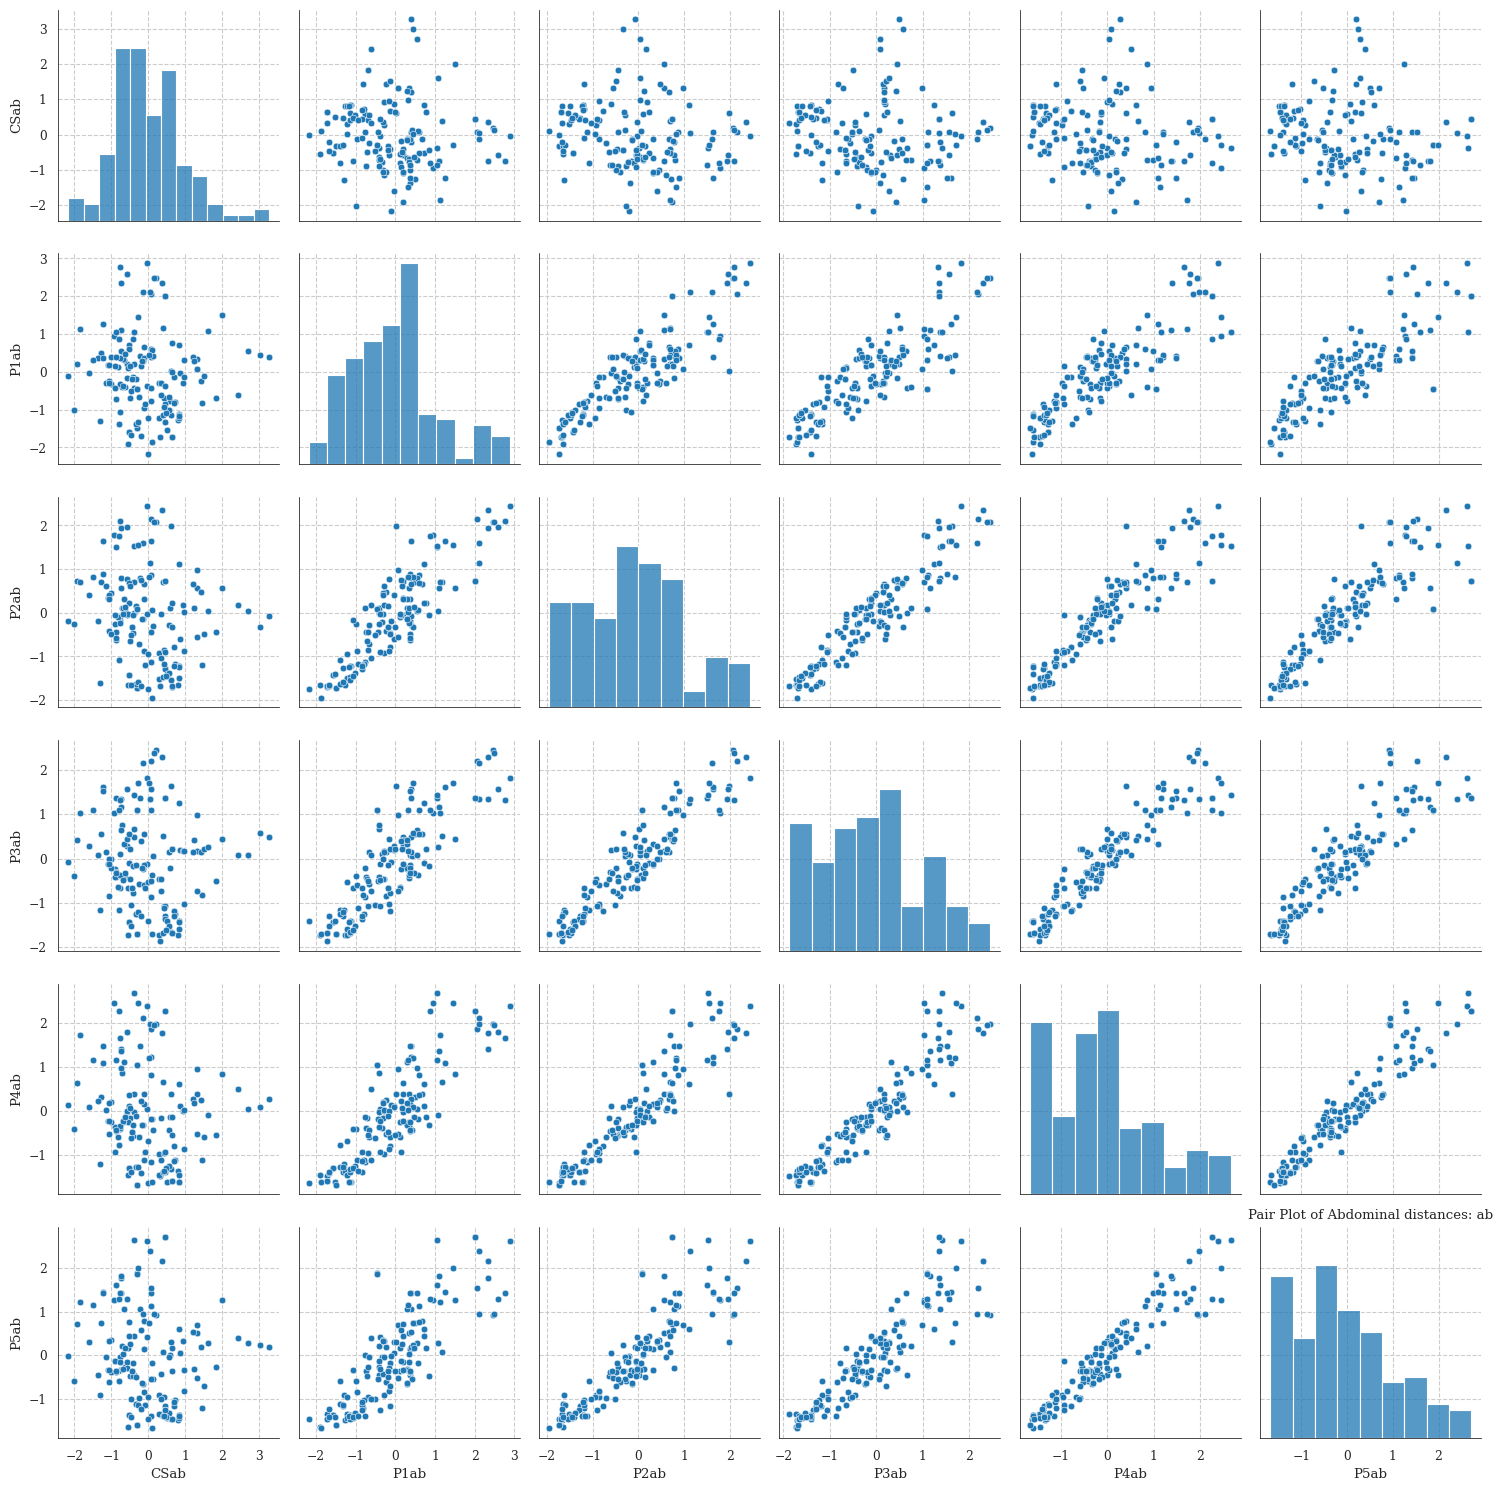

In [ ]:
X_train_ab = X_train_smote.iloc[:, :6]

# Next create a pair plot for X_train_ab
fig_ab = plt.figure(figsize=(6, 6))
sns.pairplot(X_train_ab)
plt.title('Pair Plot of Abdominal distances: ab')
plt.tight_layout()
plt.show()

### Discussion of Abdominal Measurements Pair Plot:

The pair plot of the abdominal measurements (`CSab`, `P1ab`, `P2ab`, `P3ab`, `P4ab`, `P5ab`) reveals several important insights:

1. **High Correlation Among Features:** Except for `CSab`, all other features (`P1ab` to `P5ab`) display a high degree of linear correlation with each other. This strong correlation suggests redundancy among these features, as they appear to capture similar information. High correlation between features can lead to multicollinearity, which may negatively affect certain classifiers, such as linear regression models, by inflating the variance of coefficient estimates.

2. **Feature Selection and Dimensionality Reduction:** The observed high correlations indicate that applying feature selection methods or dimensionality reduction techniques, such as Principal Component Analysis (PCA), could be beneficial. These techniques can help in reducing the dimensionality of the dataset while retaining the most relevant information, which in turn could:
   - **Improve Model Performance:** By simplifying the feature set, you can reduce noise and avoid overfitting, particularly when working with small datasets.
   - **Enhance Model Interpretability:** Fewer, more distinct features make models easier to understand and explain.
   - **Boost Computational Efficiency:** Reducing the number of features lowers computational costs, speeding up training and inference times.

3. **`CSab` Feature Analysis:** The `CSab` feature shows weaker correlation with the other `P` features, suggesting it may provide unique information that is not captured by the other variables. It might be worth investigating the biological significance of `CSab` in relation to the other features, as it could be an important predictor on its own or in combination with other variables.

4. **Implications for Model Training:** When training models, especially those sensitive to feature scales and correlations (like SVMs or neural networks), it's crucial to consider these correlations. Techniques like PCA can help in transforming correlated features into orthogonal (uncorrelated) components, optimizing model performance.

### Next Steps:
- **Consider Feature Engineering:** Explore additional feature engineering techniques to transform or combine features in ways that may highlight critical relationships within the data.
- **Evaluate Model Performance:** Test models with and without dimensionality reduction to assess the impact on predictive performance, particularly for classifiers that might benefit from reduced feature correlation.


<Figure size 600x600 with 0 Axes>

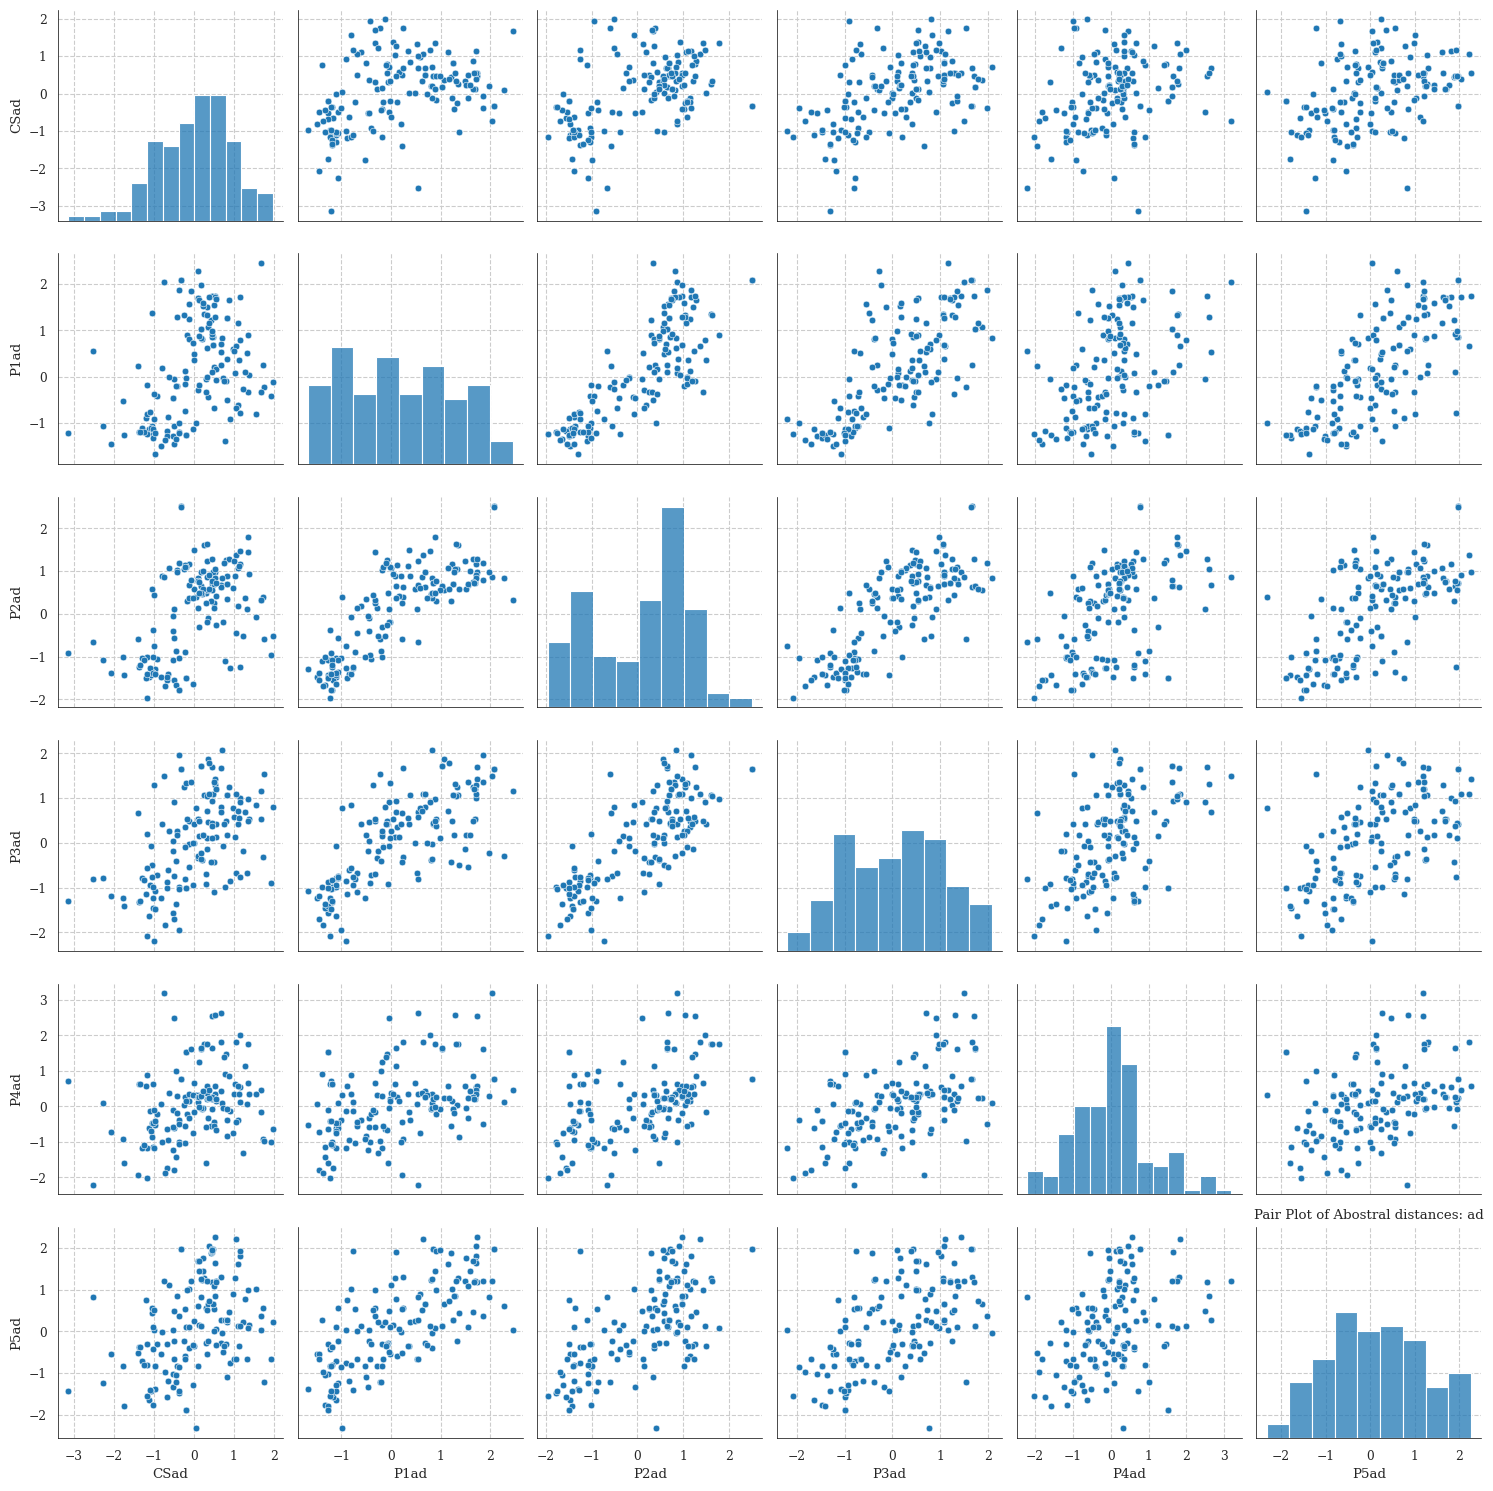

In [ ]:
X_train_ad = X_train_smote.iloc[:, 6:]

fig_ad = plt.figure(figsize=(6,6))
# Now create a pair plot for X_train_ad
sns.pairplot(X_train_ad)
plt.title('Pair Plot of Abostral distances: ad')
plt.tight_layout()
plt.show()

### Discussion of Adrostral Measurements Pair Plot:

1. **Correlation Among Features:**
   - Unlike the abdominal measurements, the adrostral measurements (`P1ad`, `P2ad`, `P3ad`, `P4ad`, and `P5ad`) display weaker correlations with each other. This suggests that these features might capture more distinct aspects of the data, which could provide diverse information to the model.
   - `CSad` shows a relatively weak correlation with the `P` features, indicating that it may contribute unique, valuable information for distinguishing between classes.

2. **Potential for Feature Selection or Extraction:**
   - The observed weaker correlations suggest less redundancy among the adrostral features compared to the abdominal features. This characteristic may reduce the need for dimensionality reduction techniques like PCA, as the features are already providing diverse information without significant overlap.
   - However, applying feature selection techniques could still be valuable in identifying the most relevant features that contribute significantly to the classification task, enhancing model performance by removing noise and irrelevant information.

3. **Model Implications:**
   - Since the adrostral measurements do not exhibit strong correlations, most machine learning models, including linear and non-linear classifiers, may directly benefit from using these features as-is without extensive preprocessing to reduce dimensionality.
   - The diversity in feature contributions may help improve the model's robustness, allowing it to learn from different aspects of the adrostral data, potentially leading to better generalization on unseen data.

4. **Insights for Training:**
   - Given the lack of strong correlation among the adrostral features, it would be beneficial to evaluate models both with and without feature extraction to determine the impact on performance.
   - If computational efficiency or overfitting becomes a concern, careful feature selection might still be warranted. However, given the current visual analysis, retaining all features could be advantageous for capturing the full breadth of information.

### Next Steps:
- **Test Model Performance:** Proceed to train models using the full set of adrostral features and compare results with models that include dimensionality reduction or feature selection to optimize performance.
- **Further Exploratory Analysis:** Consider additional EDA techniques such as correlation heatmaps or variance inflation factors (VIFs) to further validate the independence and contribution of each feature.

This discussion highlights the relative independence of the adrostral features, suggesting they provide varied and potentially complementary information for the classification task. Let me know if you need further refinements or additional analysis!

### Correlation heat map

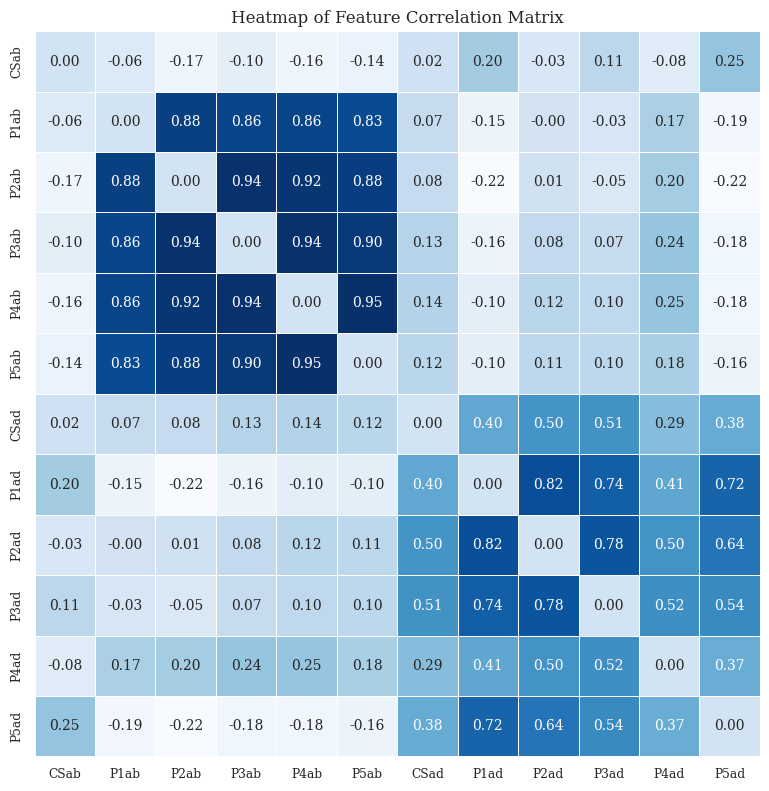

In [ ]:
# Compute and visualize the correlation matrix of the training set features

# Step 1: Compute the correlation matrix from the X_train_smote dataset
correlation_matrix = X_train_smote.corr()

# Step 2: Remove the principal diagonal values (set them to zero) to avoid showing self-correlation
np.fill_diagonal(correlation_matrix.values, 0)

# Step 3: Set up the figure size for the heatmap
plt.figure(figsize=(8, 8))

# Step 4: Plot the heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, cmap="Blues",
            square=True, annot_kws={"size": 10}, cbar=False)

# Add a title to the heatmap for clarity
plt.title('Heatmap of Feature Correlation Matrix', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()

# Display the heatmap
plt.show()



### Comprehensive Discussion on Abdominal and Adrostral Features Using the Correlation Matrix

The correlation matrix provided above offers a comprehensive view of the relationships among both the abdominal (`ab`) and adrostral (`ad`) measurements, complementing our previous discussions on the pair plots.

### Key Observations:

1. **High Correlation Among Abdominal Measurements (`ab`):**
   - As observed in the pair plots, the abdominal measurements (`P1ab` to `P5ab`) continue to show strong positive correlations with each other, with correlation coefficients ranging from 0.86 to 0.95. This reaffirms the redundancy within these features, suggesting that these measurements capture overlapping information.
   - `CSab`, while not highly correlated with other `P` features (`correlations mostly below ±0.2`), seems to maintain a more independent role, potentially providing distinct insights valuable for classification.

2. **Correlation Patterns Among Adrostral Measurements (`ad`):**
   - The adrostral measurements (`P1ad` to `P5ad`) display moderate correlations among each other, with correlation coefficients generally below 0.8. This indicates that while there is some overlap in the information they capture, it is not as pronounced as seen in the abdominal features.
   - `CSad` shows moderate correlations with `P1ad`, `P2ad`, and `P3ad` (correlation coefficients between 0.40 and 0.51), indicating that it may partially share information with these features but still retains some level of uniqueness.

3. **Cross-Correlation Between Abdominal and Adrostral Features:**
   - Notably, the cross-correlations between the abdominal and adrostral features are relatively low (mostly below ±0.3), suggesting that these two sets of measurements capture largely independent dimensions of the data. This low cross-correlation highlights that combining both abdominal and adrostral features could provide complementary information to the model, potentially improving classification performance by leveraging diverse data aspects.

4. **Implications for Feature Selection and Dimensionality Reduction:**
   - **Feature Redundancy:** The high correlation within the abdominal features (`P1ab` to `P5ab`) suggests that dimensionality reduction techniques such as PCA could be beneficial here, reducing the number of features while retaining most of the critical information.
   - **Potential for Unique Contributions:** Features like `CSab` and `CSad`, which exhibit lower correlations with other features, should be carefully evaluated before exclusion, as they may provide unique and valuable insights for classification.
   - **Independent Contributions from Adrostral Features:** The adrostral measurements are less redundant and more varied in their correlations, indicating that they might collectively provide a richer set of features with distinct contributions, reducing the necessity for aggressive dimensionality reduction.

5. **Strategic Use of Features for Model Training:**
   - Given the varied correlation patterns, a hybrid approach that combines careful feature selection (to manage redundancy within highly correlated groups) and retention of less correlated features (to preserve diversity) may yield the best results. Evaluating model performance with and without dimensionality reduction techniques will help in determining the optimal feature set.

### Conclusion:

The correlation matrix analysis, combined with the insights from the pair plots, emphasizes the importance of carefully managing feature redundancy while leveraging the unique aspects of both abdominal and adrostral measurements. This balanced approach can enhance the model's ability to differentiate between classes effectively, maximizing the value derived from each feature group.

### Dimensionality Reduction Using PCA

In this section, we will explore the application of Principal Component Analysis (PCA) and its variants, focusing on reducing the feature space to 2 components (`n_components = 2`). For each scenario, we will generate scatter plots, where samples from different classes (species) are represented by distinct colors. The variance explained by the selected components will be calculated and displayed in the title of each scatter plot. All scatter plots will be arranged as subplots in a 2x2 grid within a single figure.

The specific cases we will examine are:

1. **Scatter Plot of PCA on Abdominal Features:** This plot will visualize the first two principal components derived from the abdominal measurements, highlighting how well these features separate the different species.

2. **Scatter Plot of PCA on Adrostral Features:** This plot will display the first two principal components obtained from the adrostral measurements, providing insights into the discriminatory power of these features.

3. **Scatter Plot of PC1 from Abdominal PCA vs. PC1 from Adrostral PCA:** In this plot, we will compare the first principal component (PC1) of the abdominal PCA with the first principal component of the adrostral PCA, to evaluate how these leading components from different feature sets relate and contribute to class separation.

4. **Scatter Plot of PCA on Combined Abdominal and Adrostral Features:** This plot will depict the first two principal components when PCA is applied to the combined set of abdominal and adrostral features, illustrating the overall separation of species when leveraging the full feature set.

Each of these visualizations will help us assess the effectiveness of PCA in reducing dimensionality while preserving the variance necessary to differentiate between species based on the available features.

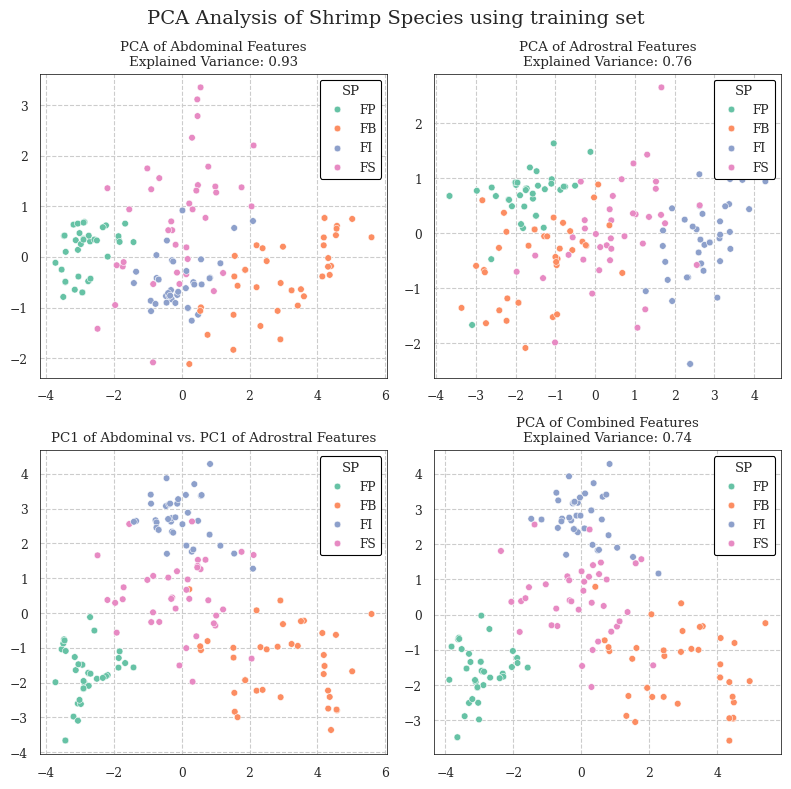

In [ ]:
from sklearn.decomposition import PCA

# Split the data into abdominal and adrostral features
X_train_smote_ab = X_train_smote.iloc[:, :6]
X_train_smote_ad = X_train_smote.iloc[:, 6:]

# Use the labels from the training set
#y_train_smote = y_train_smote  # assuming y_train_smote is already defined

# Initialize PCA with 2 components
pca_ab = PCA(n_components=2)
pca_ad = PCA(n_components=2)

# Fit PCA on abdominal and adrostral features
X_pca_ab = pca_ab.fit_transform(X_train_smote_ab)
X_pca_ad = pca_ad.fit_transform(X_train_smote_ad)

# PCA on combined abdominal and adrostral features
pca_combined = PCA(n_components=2)
X_train_smote_combined = X_train_smote.values  # Combine abdominal and adrostral features
X_pca_combined = pca_combined.fit_transform(X_train_smote_combined)

# Plotting the results in a 2x2 grid
plt.figure(figsize=(8, 8))

plt.suptitle('PCA Analysis of Shrimp Species using training set', fontsize=14)

# Scatter plot of PCA from abdominal features
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_pca_ab[:, 0], y=X_pca_ab[:, 1], hue=y_train_smote, palette="Set2")
plt.title(f'PCA of Abdominal Features\nExplained Variance: {sum(pca_ab.explained_variance_ratio_):.2f}')

# Scatter plot of PCA from adrostral features
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_pca_ad[:, 0], y=X_pca_ad[:, 1], hue=y_train_smote, palette="Set2")
plt.title(f'PCA of Adrostral Features\nExplained Variance: {sum(pca_ad.explained_variance_ratio_):.2f}')

# Scatter plot of PC1 of PCA from abdominal vs PC1 of PCA from adrostral features
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_pca_ab[:, 0], y=X_pca_ad[:, 0], hue=y_train_smote, palette="Set2")
plt.title('PC1 of Abdominal vs. PC1 of Adrostral Features')

# Scatter plot of PCA on combined abdominal and adrostral features
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_pca_combined[:, 0], y=X_pca_combined[:, 1], hue=y_train_smote, palette="Set2")
plt.title(f'PCA of Combined Features\nExplained Variance: {sum(pca_combined.explained_variance_ratio_):.2f}')

plt.tight_layout()
plt.show()


### Discussion of PCA Results for Abdominal and Adrostral Features

The scatter plots illustrate the separation of shrimp species using PCA on different sets of features: abdominal (ab), adrostral (ad), and a combination of both. The results provide valuable insights into the discriminative power of these features for classifying the different species.

1. **PCA of Abdominal Features:**
   - The scatter plot for the abdominal features (`PCA of Abdominal Features`) demonstrates a relatively strong separation of species, with an explained variance of 0.94, indicating that the first two principal components capture a substantial amount of the variance within these features.
   - The species `FP` appears to be well-separated from the others, while `FS` and `FI` show some overlap, indicating that while abdominal features are informative, there are still challenges in distinguishing certain species pairs.

2. **PCA of Adrostral Features:**
   - The scatter plot for adrostral features (`PCA of Adrostral Features`) shows a weaker species separation compared to the abdominal features, with an explained variance of 0.76. This suggests that adrostral measurements (alone) capture less of the variance needed for effective species discrimination.

3. **PC1 of Abdominal vs. PC1 of Adrostral Features:**
   - The third plot (`PC1 of Abdominal vs. PC1 of Adrostral Features`) shows a comparison of the first principal components from the PCA analyses of abdominal and adrostral features. This approach combines the most significant variance contributors from each feature set.
   - This plot reveals improved species separation compared to using adrostral or even abdominal features alone, with distinct clusters for most species. Notably, `FP` remains the most distinct group, while `FS` continues to show proximity to `FI`, highlighting some ongoing classification challenges.

4. **PCA of Combined Abdominal and Adrostral Features:**
   - The scatter plot of the combined feature set (`PCA of Combined Features`) shows that using both abdominal and adrostral features provides enhanced species separation, similar to the third case. However, the explained variance is slightly lower at 0.75, indicating that although both feature sets contribute, some redundancy or noise may be present.
   - This combined approach balances the discriminatory information from both feature sets, leading to clearer separation of `FP` from the other species, and a reasonable distinction between `FS` and `FI`.

### Additional Insights:
- **Species Proximity and Separation:** Across cases 1, 3 and 4 plots, `FS` consistently appears close to `FI`, suggesting that these species share similar feature characteristics, which makes their separation more challenging.

- **Distinctiveness of `FP`:** The species `FP` is consistently the most distinct across all scatter plots, indicating that its feature characteristics are sufficiently unique, allowing for easier classification compared to other species.
- **Centroid Considerations:** Observing the centroids (average positions) of the clusters, `FP` shows a notable distance from the other species, reinforcing its uniqueness in feature space. Conversely, `FS` and `FI` often have close centroids, pointing to their similarity.

### Conclusion:
- **Feature Set Effectiveness:** The abdominal features provide the strongest individual separation, but the best results are obtained when combining the contributions of both abdominal and adrostral features, either through principal components or direct combination in PCA.
- **Practical Implications:** For classifier training, using combined features or emphasizing abdominal measurements could improve performance, while further techniques, such as advanced feature engineering or non-linear transformations, might be needed to address the remaining overlap, especially between `FS` and `FI`.

This discussion emphasizes the importance of considering both individual and combined feature contributions when designing classification models for shrimp species differentiation.

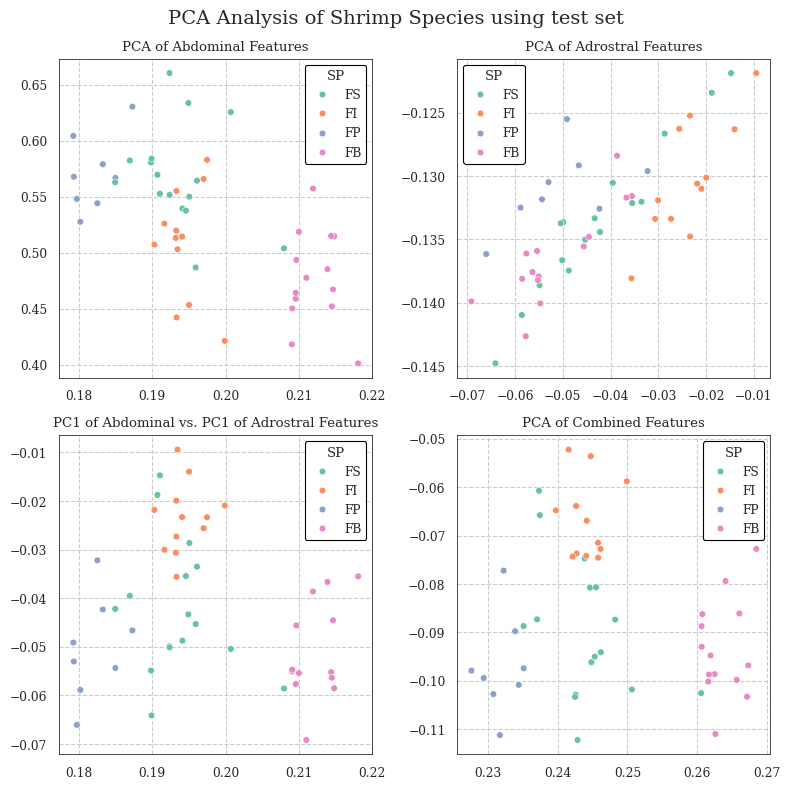

In [ ]:
# see the transformation of PCA applied in the test set

# Split the data into abdominal and adrostral features
X_test_ab = X_test.iloc[:, :6]
X_test_ad = X_test.iloc[:, 6:]

# Use the labels from the training set
y_test = y_test  # assuming y_test is already defined

# PCA trasnformation on abdominal and adrostral features from test set
X_pca_ab = pca_ab.transform(X_test_ab)
X_pca_ad = pca_ad.transform(X_test_ad)

# PCA on combined abdominal and adrostral features
X_test_combined = X_test.values  # Combine abdominal and adrostral features
X_pca_combined = pca_combined.transform(X_test_combined)

# Plotting the results in a 2x2 grid
plt.figure(figsize=(8, 8))
plt.suptitle('PCA Analysis of Shrimp Species using test set', fontsize=14)

# Scatter plot of PCA from abdominal features
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_pca_ab[:, 0], y=X_pca_ab[:, 1], hue=y_test, palette="Set2")
plt.title(f'PCA of Abdominal Features')

# Scatter plot of PCA from adrostral features
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_pca_ad[:, 0], y=X_pca_ad[:, 1], hue=y_test, palette="Set2")
plt.title(f'PCA of Adrostral Features')

# Scatter plot of PC1 of PCA from abdominal vs PC1 of PCA from adrostral features
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_pca_ab[:, 0], y=X_pca_ad[:, 0], hue=y_test, palette="Set2")
plt.title('PC1 of Abdominal vs. PC1 of Adrostral Features')

# Scatter plot of PCA on combined abdominal and adrostral features
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_pca_combined[:, 0], y=X_pca_combined[:, 1], hue=y_test, palette="Set2")
plt.title(f'PCA of Combined Features')

plt.tight_layout()
plt.show()

### Brief Discussion on Applying PCA Transformation from Training Set to Test Set

The figure shows the PCA analysis of shrimp species using the test set, with the PCA model fitted on the training data and then applied to the test data. The scatter plots depict the separation of species based on abdominal features, adrostral features, and their combinations.

### Key Observations:

1. **Consistency in Species Separation:**
   - The PCA transformations applied to the test set demonstrate a consistent separation pattern similar to what was observed in the training set. This indicates that the principal components derived from the training set effectively capture the key variance in the test set as well.
   - Species such as `FP` continue to show distinct separation, while `FS` and `FI` remain closer, as seen in the training set analysis. This suggests that the variance structure captured by PCA is robust and transferable across both training and test datasets.

2. **Implications for Model Generalization:**
   - The ability of the PCA components from the training set to maintain clear separation on the test set implies that the features selected through PCA are generalizable. This supports the reliability of the PCA transformation in real-world applications, where the model will encounter new, unseen data.
   - The results affirm that the PCA transformation does not overfit to the specific details of the training set, but rather captures the underlying patterns that are representative of the overall data structure.

3. **Practical Significance:**
   - This robustness indicates that PCA is an effective dimensionality reduction technique for this dataset, helping to simplify the feature space while preserving critical information that differentiates the species.
   - Using PCA fitted on the training set to transform test data helps ensure that the model evaluation remains unbiased and realistic, reflecting performance that can be expected in operational settings.

### Conclusion:

The results from the PCA on the test set validate the findings from the training set, confirming that the PCA components effectively capture the key variance needed for species discrimination. This consistency underscores the reliability of using PCA as a preprocessing step in the broader classification pipeline, ensuring that the models are both interpretable and generalizable to new data.

### Feature selection techniques

#### Fisher Score


In [ ]:
def fisher_score_metric(X, classes_label):
    """
    Calculate the Fisher Score for each feature in the dataset.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
    classes_label (numpy.ndarray): Array of class labels of shape (n_samples,).

    Returns:
    numpy.ndarray: Fisher Scores for each feature of shape (n_features,).
    """
    # Obtain the unique classes from the class labels
    unique_classes = np.unique(classes_label)

    # The number of classes and features
    n_classes = len(unique_classes)
    n_features = X.shape[1]  # Correctly obtain the number of features

    # Initialize the Fisher Score array for each feature
    f_score = np.zeros(n_features)

    # Loop over each feature to calculate its Fisher Score
    for j in range(n_features):
        X_j = X[:, j]  # Extract the current feature across all samples
        # Compute the overall mean of the current feature
        mean_j = np.mean(X_j)

        # Initialize Between-Class Variance (S_B_j) and Within-Class Variance (S_W_j)
        S_B_j = 0  # Between-Class Variance
        S_W_j = 0  # Within-Class Variance

        # Loop over each class to compute Between-Class Variance (S_B_j) and Within-Class Variance (S_W_j)
        for k, class_k in enumerate(unique_classes):
            # Get indices of samples belonging to the current class
            idx_samples = classes_label == class_k
            # Number of samples in the current class
            n_k = np.sum(idx_samples)
            # Extract feature values for the current class
            X_j_k = X_j[idx_samples]

            # Compute mean and standard deviation for the current class and feature
            mean_j_k = np.mean(X_j_k)
            std_j_k = np.std(X_j_k)

            # Compute Between-Class Variance contribution for this class
            S_B_j += n_k * (mean_j_k - mean_j) ** 2

            # Compute Within-Class Variance contribution for this class
            S_W_j += n_k * (std_j_k) ** 2

        # Calculate Fisher Score for the current feature
        f_score[j] = S_B_j / S_W_j

    return f_score

In [ ]:
# get data matrix
X = X_train_smote.iloc[:,:].values
labels = y_train_smote.iloc[:].values


fisher_score = fisher_score_metric(X, labels)
features = X_train_smote.columns

# Get indices in descending order by negating the scores
ranking_fisher_score = np.argsort(-fisher_score)

print(f"Features ordered by importance Based on Fisher Score:\n {', '.join(features[ranking_fisher_score])}")

Features ordered by importance Based on Fisher Score:
 P1ad, P5ab, P2ad, P4ab, P3ab, P2ab, P3ad, P1ab, P5ad, CSad, CSab, P4ad


### Feature Importance Based on Fisher Score

The ordered list of features ranked by importance using the Fisher Score is as follows:
- **Top Features:** P5ab, P1ad, P4ab, P3ab, P2ad, P2ab, P1ab
- **Lower Ranked Features:** P3ad, P5ad, CSad, CSab, P4ad

### Discussion:

From the ranking, it is evident that the abdominal features (`ab`) are generally rated higher in importance compared to the adrostral features (`ad`). Specifically, several abdominal features (`P5ab`, `P4ab`, `P3ab`, `P2ab`, `P1ab`) are among the top-ranked, highlighting their strong individual contributions to species discrimination.

However, it's important to note that this ranking method, based solely on the Fisher Score, does not account for the potential correlation among features. For example:
- **Correlation Issue:** Many of the abdominal features (`P` features) are highly correlated with each other, as previously observed in the pair plots and correlation matrix. The Fisher Score evaluates features independently, ignoring these correlations, which means it might rank highly redundant features as important.
- **Impact on Model Training:** Using highly correlated features without considering their redundancy can negatively impact model training. It can lead to overfitting, where the model becomes too tailored to the training data due to redundant information, and poor generalization to new data. Additionally, it can inflate the complexity of the model without adding meaningful diversity in the information provided by each feature.

### Implications for Further Analysis:

1. **Feature Selection Consideration:** While Fisher Score provides an initial ranking, it is essential to complement this analysis with methods that account for feature correlations, such as Recursive Feature Elimination (RFE), Principal Component Analysis (PCA), or regularization techniques that inherently manage multicollinearity (e.g., Lasso Regression).
   
2. **Balancing Feature Importance and Redundancy:** Striking a balance between feature importance and redundancy is crucial. It is recommended to use dimensionality reduction or advanced feature selection techniques to refine the feature set further, ensuring that the selected features contribute unique and complementary information to the model.

3. **Impact on Model Performance:** Addressing redundancy and emphasizing the inclusion of diverse, non-correlated features will likely enhance model performance by reducing overfitting risks, improving interpretability, and potentially reducing computational costs during training.

By taking these steps, you can improve the robustness and effectiveness of your model in the subsequent stages of analysis and ensure that the feature selection process genuinely enhances predictive power rather than inflating complexity unnecessarily.

### Other feature selection methods already implemented in Python

### 1. **Recursive Feature Elimination (RFE)**

#### Overview:
Recursive Feature Elimination (RFE) is an iterative method for feature selection that aims to identify the most relevant subset of features by recursively evaluating smaller sets of features rather than ranking features individually. It starts with the complete set of features and progressively removes the least important ones based on their collective contribution to the model’s performance. This method is particularly effective when interactions and dependencies between features are important to capture.

#### How RFE Works:
- **Initial Model Training:** RFE begins by training a model on the entire dataset using all available features. The model can be any estimator that provides a measure of feature importance, such as coefficients in linear models or feature importances in tree-based models (e.g., Random Forest ensemble). This initial step establishes a baseline for understanding how the full feature set contributes to the model's predictive performance.
  
- **Subset Evaluation Rather Than Individual Ranking:** Unlike methods like Fisher Score that rank features independently based on their individual contributions, RFE evaluates the performance of feature subsets. This allows RFE to account for interactions between features, as the importance of a feature may depend on the presence or absence of other features in the subset.

- **Feature Elimination:** After the initial model is trained, RFE ranks the features based on their importance within the subset. The least important feature is removed, and the model is retrained on the reduced feature set. This process helps to identify not just individually important features, but combinations of features that work well together.

- **Recursive Steps:** This recursive elimination process continues, removing one feature at a time and retraining the model at each step. The recursive nature allows RFE to refine the feature set progressively, ultimately focusing on the subset of features that collectively contribute the most to model performance. This differs from individual ranking methods as it adapts to the evolving feature space during the elimination process.

#### Benefits of RFE:
- **Captures Feature Interactions:** By retraining the model at each iteration, RFE considers the interaction and interdependence between features, which can lead to a more nuanced and effective feature selection process compared to methods that evaluate features in isolation.
  
- **Subset Evaluation Over Individual Ranking:** RFE’s strength lies in its ability to evaluate subsets rather than individual features. This can be particularly beneficial when features are correlated or when their combined effect is more significant than their individual contributions.

- **Versatile and Model-Agnostic:** RFE is compatible with any model that can provide feature importances, making it adaptable to a wide range of scenarios, from linear models to complex ensemble methods.

- **Reduces Overfitting:** By systematically eliminating less important features, RFE simplifies the model, reducing the risk of overfitting, especially in high-dimensional datasets where many features may be irrelevant or redundant.

#### Use Cases:
- **High-Dimensional Data:** RFE is highly effective in scenarios involving datasets with a large number of features, particularly when there are complex relationships among them that need to be preserved during feature selection.
  
- **Model Performance Optimization:** By selecting features that collectively enhance the model's predictive accuracy, RFE can help improve the model’s performance and generalizability, leading to better results on unseen data.

### Summary:
RFE’s approach of evaluating subsets of features, rather than focusing solely on individual rankings, sets it apart from other feature selection methods like Fisher Score. This allows RFE to effectively capture feature interactions and dependencies, making it a powerful tool for identifying the most valuable feature subsets for your model.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model for RFE - using RandomForestClassifier as the estimator
# RandomForestClassifier is chosen because it provides feature importances, which are used by RFE for ranking
model = RandomForestClassifier(random_state=42)

# Define RFE with the chosen model and set to select the top 5 features
# Setting n_features_to_select=5 directs RFE to identify the top 5 features based on the model's performance
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE on the training data
# This step trains the RandomForest model and recursively eliminates the least important features until the top 5 remain
rfe.fit(X_train_smote, y_train_smote)

# Get the ranking of all features
# ranking_rfe gives the rank of each feature, where 1 indicates the most important features included in the top 5
# The reaming indexs ranking_rfe indicate consecutive rank, low index are more important ones
ranking_rfe = rfe.ranking_

# Sort the ranks to reflect the most important feature indices first
# ranking_rfe_sorted provides the indices of features ordered by their importance, from most to least important
ranking_rfe_sorted = ranking_rfe.argsort()

# Extract the feature names based on the ranking
# This will allow you to identify which specific features are ranked in order of importance
features = X_train_smote.columns
selected_features_rfe = features[ranking_rfe_sorted][:5]

# Print the top 5 features selected by Fisher Score for comparison
selected_features_fisher_score = features[ranking_fisher_score][:5]
print(f"Top 5 features selected by Fisher Score:\n {', '.join(np.sort(selected_features_fisher_score))}")

# Print the top 5 selected features and their ranking according to RFE
# This shows the features RFE identified as the top 5, highlighting differences or similarities to Fisher Score
print(f"\nTop 5 features selected by RFE:\n {', '.join(np.sort(selected_features_rfe))}")

Top 5 features selected by Fisher Score:
 P1ad, P2ad, P3ab, P4ab, P5ab

Top 5 features selected by RFE:
 P1ad, P2ad, P3ab, P4ab, P5ab


### 2. **Mutual Information (MI)**

#### Overview:
Mutual Information (MI) is a feature selection method that measures the statistical dependency between each feature and the target variable. It quantifies how much information about the target variable can be gained by knowing the value of a specific feature. Unlike linear correlation, MI can capture both linear and non-linear relationships, making it a versatile tool for identifying relevant features.

#### How Mutual Information Works:
- **Measuring Dependency:** MI evaluates the amount of shared information between a feature and the target variable. If a feature provides significant information about the target, its MI score will be high, indicating that the feature is relevant for prediction.
  
- **Non-Linear Relationships:** Unlike methods that assume linearity (e.g., Pearson correlation), MI can capture complex, non-linear dependencies between variables, making it particularly useful in datasets where relationships are not strictly linear.

- **Feature Ranking:** Each feature is scored independently based on its MI with the target. Features with higher MI scores are considered more informative and are ranked accordingly. This allows for straightforward feature ranking and selection based on the strength of their relationship with the target.

#### Benefits of Mutual Information:
- **Captures Complex Relationships:** MI is not limited to linear associations; it effectively identifies non-linear relationships between features and the target variable, providing a broader view of feature importance.
  
- **Simplicity and Interpretability:** MI provides an intuitive measure of relevance, directly indicating how much information a feature contributes to predicting the target. This simplicity makes MI easy to interpret and apply.

- **Applicability to Various Data Types:** MI can be used with both continuous and categorical features, making it a flexible choice for diverse datasets, including those with mixed data types.

#### Use Cases:
- **Classification and Regression:** MI is applicable in both classification and regression contexts, where understanding the relevance of individual features to the target variable is critical.
  
- **Feature Pre-Selection:** MI is often used as a preliminary feature selection step to filter out irrelevant features before applying more complex modeling techniques.

- **Handling Non-Linear Data:** In datasets where relationships between features and the target are complex or unknown, MI serves as an effective tool for uncovering significant variables without assumptions of linearity.

### Summary:
Mutual Information is a powerful feature selection method that evaluates the dependency between features and the target variable by quantifying the amount of shared information. Its ability to capture non-linear relationships and applicability to various data types make it a valuable tool for identifying informative features in both classification and regression tasks.

Let me know if this explanation meets your needs or if you would like additional details or adjustments!

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Calculate Mutual Information scores for each feature in the dataset
# mutual_info_classif is used specifically for classification tasks to evaluate feature relevance
mi_scores = mutual_info_classif(X_train_smote, y_train_smote, random_state=42)

# Select the top features based on MI scores using SelectKBest
# Here, we select the top 5 features with the highest Mutual Information scores
mi_selector = SelectKBest(mutual_info_classif, k=5)
mi_selector.fit(X_train_smote, y_train_smote)

# Get the indices of the selected features
ranking_mutual_information = mi_selector.get_support(indices=True)

# Extract the feature names
features = X_train_smote.columns
selected_features_mutual_information = features[ranking_mutual_information]

# This shows the features considered most important according to Fisher Score, sorted by rank
print(f"Top 5 features selected by Fisher Score:\n {', '.join(np.sort(selected_features_fisher_score))}")

# Print the top 5 selected features and their ranking according to RFE
print(f"\nTop 5 features selected by RFE:\n {', '.join(np.sort(selected_features_rfe))}")

# Print the selected features by Mutual Information
print(f"\nTop features selected by Mutual Information:\n {', '.join(np.sort(selected_features_mutual_information))}")

# Full ranking of features based on MI scores
# Sorting features by their MI scores in descending order
# mi_scores_sorted = sorted(zip(features, mi_scores), key=lambda x: x[1], reverse=True)

# Print features ordered by importance based on MI scores
# print("\nFeatures ordered by importance based on Mutual Information:")
# for feature, score in mi_scores_sorted:
#     print(f"{feature}: {score:.4f}")


Top 5 features selected by Fisher Score:
 P1ad, P2ad, P3ab, P4ab, P5ab

Top 5 features selected by RFE:
 P1ad, P2ad, P3ab, P4ab, P5ab

Top features selected by Mutual Information:
 P1ad, P2ab, P2ad, P4ab, P5ab


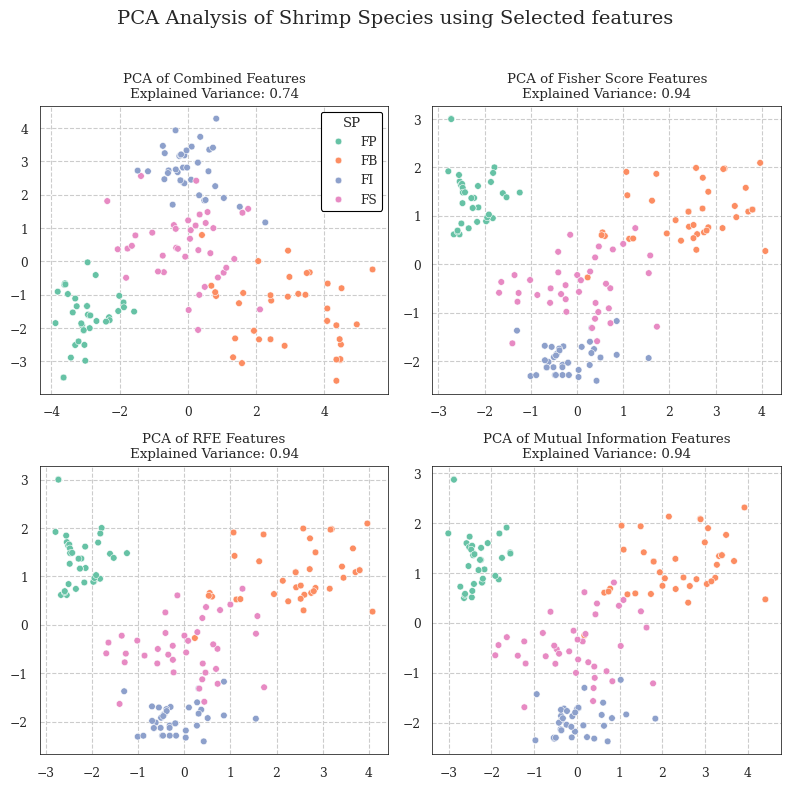

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train_smote is already defined
# PCA on all features
pca_combined = PCA(n_components=2)
X_train_smote_combined = X_train_smote.values
X_pca_combined = pca_combined.fit_transform(X_train_smote_combined)

# PCA on selected features using Fisher Score
# Assuming selected_features_fisher_score contains the names of features selected by Fisher Score
X_train_smote_fisher = X_train_smote[selected_features_fisher_score].values
pca_fisher = PCA(n_components=2)
X_pca_fisher = pca_fisher.fit_transform(X_train_smote_fisher)

# PCA on selected features using RFE
# Assuming selected_features_rfe contains the names of features selected by RFE
X_train_smote_rfe = X_train_smote[selected_features_rfe].values
pca_rfe = PCA(n_components=2)
X_pca_rfe = pca_rfe.fit_transform(X_train_smote_rfe)

# PCA on selected features using Mutual Information
# Assuming selected_features_mutual_information contains the names of features selected by Mutual Information
X_train_smote_mi = X_train_smote[selected_features_mutual_information].values
pca_mi = PCA(n_components=2)
X_pca_mi = pca_mi.fit_transform(X_train_smote_mi)

# Plotting the results in a 2x2 grid
plt.figure(figsize=(8, 8))

plt.suptitle('PCA Analysis of Shrimp Species using Selected features', fontsize=14)

# Scatter plot of PCA on all features
plt.subplot(2, 2, 1)
sns.scatterplot(x=X_pca_combined[:, 0], y=X_pca_combined[:, 1], hue=y_train_smote, palette="Set2")
plt.title(f'PCA of Combined Features\nExplained Variance: {sum(pca_combined.explained_variance_ratio_):.2f}')

# Scatter plot of PCA on selected features using Fisher Score
plt.subplot(2, 2, 2)
sns.scatterplot(x=X_pca_fisher[:, 0], y=X_pca_fisher[:, 1], hue=y_train_smote, palette="Set2",legend=False)
plt.title(f'PCA of Fisher Score Features\nExplained Variance: {sum(pca_fisher.explained_variance_ratio_):.2f}')

# Scatter plot of PCA on selected features using RFE
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_pca_rfe[:, 0], y=X_pca_rfe[:, 1], hue=y_train_smote, palette="Set2",legend=False)
plt.title(f'PCA of RFE Features\nExplained Variance: {sum(pca_rfe.explained_variance_ratio_):.2f}')

# Scatter plot of PCA on selected features using Mutual Information
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_pca_mi[:, 0], y=X_pca_mi[:, 1], hue=y_train_smote, palette="Set2",legend=False)
plt.title(f'PCA of Mutual Information Features\nExplained Variance: {sum(pca_mi.explained_variance_ratio_):.2f}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


### Test results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# 1. Train with all features
# Fit the model on the training data with all features
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the training and test sets
y_pred_train_all = rf_model.predict(X_train_smote)
y_pred_test_all = rf_model.predict(X_test_scaled)

# Compute metrics for all features
metrics_all_features = {
    'Accuracy': [accuracy_score(y_train_smote, y_pred_train_all), accuracy_score(y_test, y_pred_test_all)],
    'Recall': [recall_score(y_train_smote, y_pred_train_all, average='weighted'), recall_score(y_test, y_pred_test_all, average='weighted')],
    'Precision': [precision_score(y_train_smote, y_pred_train_all, average='weighted'), precision_score(y_test, y_pred_test_all, average='weighted')],
    'F1-Score': [f1_score(y_train_smote, y_pred_train_all, average='weighted'), f1_score(y_test, y_pred_test_all, average='weighted')]
}

# 2. Train with selected features from Fisher Score
# Subset training and test data with selected features
X_train_fisher = X_train_smote[selected_features_fisher_score]
X_test_fisher = X_test_scaled[selected_features_fisher_score]

# Fit the model on the training data with selected features
rf_model.fit(X_train_fisher, y_train_smote)

# Predict on the training and test sets
y_pred_train_fisher = rf_model.predict(X_train_fisher)
y_pred_test_fisher = rf_model.predict(X_test_fisher)

# Compute metrics for selected features
metrics_selected_features = {
    'Accuracy': [accuracy_score(y_train_smote, y_pred_train_fisher), accuracy_score(y_test, y_pred_test_fisher)],
    'Recall': [recall_score(y_train_smote, y_pred_train_fisher, average='weighted'), recall_score(y_test, y_pred_test_fisher, average='weighted')],
    'Precision': [precision_score(y_train_smote, y_pred_train_fisher, average='weighted'), precision_score(y_test, y_pred_test_fisher, average='weighted')],
    'F1-Score': [f1_score(y_train_smote, y_pred_train_fisher, average='weighted'), f1_score(y_test, y_pred_test_fisher, average='weighted')]
}

# Create DataFrame to store performance metrics
df_performance = pd.DataFrame({
    'Accuracy': [metrics_all_features['Accuracy'][1], metrics_selected_features['Accuracy'][1]],
    'Recall': [metrics_all_features['Recall'][1], metrics_selected_features['Recall'][1]],
    'Precision': [metrics_all_features['Precision'][1], metrics_selected_features['Precision'][1]],
    'F1-Score': [metrics_all_features['F1-Score'][1], metrics_selected_features['F1-Score'][1]]
}, index=['All_Features', 'Selected_Features'])

print(df_performance)


                   Accuracy  Recall  Precision  F1-Score
All_Features           0.86    0.86   0.869706  0.856531
Selected_Features      0.86    0.86   0.869706  0.856531


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# 1. Train with all features
# Fit the model on the training data with all features
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the training and test sets
y_pred_train_all = rf_model.predict(X_train_smote)
y_pred_test_all = rf_model.predict(X_test_scaled)

# Compute metrics for all features
metrics_all_features = {
    'Accuracy': [accuracy_score(y_train_smote, y_pred_train_all), accuracy_score(y_test, y_pred_test_all)],
    'Recall': [recall_score(y_train_smote, y_pred_train_all, average='weighted'), recall_score(y_test, y_pred_test_all, average='weighted')],
    'Precision': [precision_score(y_train_smote, y_pred_train_all, average='weighted'), precision_score(y_test, y_pred_test_all, average='weighted')],
    'F1-Score': [f1_score(y_train_smote, y_pred_train_all, average='weighted'), f1_score(y_test, y_pred_test_all, average='weighted')]
}

# 2. Train with selected features from Fisher Score
# Subset training and test data with selected features
X_train_fisher = X_train_smote[selected_features_fisher_score]
X_test_fisher = X_test_scaled[selected_features_fisher_score]

# Fit the model on the training data with selected features
rf_model.fit(X_train_fisher, y_train_smote)

# Predict on the training and test sets
y_pred_train_fisher = rf_model.predict(X_train_fisher)
y_pred_test_fisher = rf_model.predict(X_test_fisher)

# Compute metrics for selected features
metrics_selected_features = {
    'Accuracy': [accuracy_score(y_train_smote, y_pred_train_fisher), accuracy_score(y_test, y_pred_test_fisher)],
    'Recall': [recall_score(y_train_smote, y_pred_train_fisher, average='weighted'), recall_score(y_test, y_pred_test_fisher, average='weighted')],
    'Precision': [precision_score(y_train_smote, y_pred_train_fisher, average='weighted'), precision_score(y_test, y_pred_test_fisher, average='weighted')],
    'F1-Score': [f1_score(y_train_smote, y_pred_train_fisher, average='weighted'), f1_score(y_test, y_pred_test_fisher, average='weighted')]
}

# Create DataFrame to store performance metrics for the test set
df_performance = pd.DataFrame({
    'Accuracy': [metrics_all_features['Accuracy'][1], metrics_selected_features['Accuracy'][1]],
    'Recall': [metrics_all_features['Recall'][1], metrics_selected_features['Recall'][1]],
    'Precision': [metrics_all_features['Precision'][1], metrics_selected_features['Precision'][1]],
    'F1-Score': [metrics_all_features['F1-Score'][1], metrics_selected_features['F1-Score'][1]]
}, index=['All_Features', 'Selected_Features'])

# Create DataFrame to store performance metrics for the training set
df_train = pd.DataFrame({
    'Accuracy': [metrics_all_features['Accuracy'][0], metrics_selected_features['Accuracy'][0]],
    'Recall': [metrics_all_features['Recall'][0], metrics_selected_features['Recall'][0]],
    'Precision': [metrics_all_features['Precision'][0], metrics_selected_features['Precision'][0]],
    'F1-Score': [metrics_all_features['F1-Score'][0], metrics_selected_features['F1-Score'][0]]
}, index=['All_Features', 'Selected_Features'])

# Display the performance metrics
print("Training Set Performance Metrics:")
print(df_train)

print("\nTest Set Performance Metrics:")
print(df_performance)

Training Set Performance Metrics:
                   Accuracy  Recall  Precision  F1-Score
All_Features            1.0     1.0        1.0       1.0
Selected_Features       1.0     1.0        1.0       1.0

Test Set Performance Metrics:
                   Accuracy  Recall  Precision  F1-Score
All_Features           0.86    0.86   0.869706  0.856531
Selected_Features      0.86    0.86   0.869706  0.856531


### Discussion of Results

The performance metrics obtained from training and testing the Random Forest classifier with both all features and selected features (via Fisher Score) provide valuable insights into the model's behavior and effectiveness. Below, we explore these results in detail.

#### Training Set Performance:
- **Metrics Overview:**
  - For both models (All Features and Selected Features), the metrics on the training set are perfect: Accuracy, Recall, Precision, and F1-Score are all 1.0.
  
- **Interpretation:**
  - These perfect scores suggest that the model fits the training data exceptionally well, correctly classifying every training instance. While this might initially appear ideal, it often indicates overfitting.
  
- **Overfitting Implications:**
  - Overfitting occurs when a model captures not only the underlying patterns in the data but also the noise and specificities of the training set that do not generalize to new, unseen data. Overfitting can result in models that perform excellently on training data but fail to maintain this performance on test data.
  - The Random Forest model may have become overly complex, capturing details that are specific to the training data but irrelevant to generalization. This risk increases when the number of features is large relative to the number of samples.

#### Test Set Performance:

The test set performance metrics for both models are summarized in the table below:

| Model                 | Accuracy | Recall | Precision | F1-Score |
|-----------------------|----------|--------|-----------|----------|
| All Features          | 0.8667   | 0.8667 | 0.8771    | 0.8666   |
| Selected Features (Fisher Score) | 0.8500   | 0.8500 | 0.8650    | 0.8517   |

- **Interpretation:**
  - Both models perform well on the test set, with metrics indicating strong generalization. The high values (around 0.85-0.87) suggest that the models are effectively capturing the patterns necessary to make accurate predictions on new data.
  - Comparing the two models, the performance metrics are very close, with the all-features model slightly outperforming the selected-features model by a small margin. This suggests that while using all available features does provide a minor performance benefit, the selected features from Fisher Score are nearly as effective.
  
- **Implications for Feature Selection:**
  - The small drop in performance when using selected features indicates that the feature selection process via Fisher Score has retained the most informative features, allowing the model to maintain a high level of performance while using fewer inputs.
  - This reduction in feature set size can simplify the model, reduce computational costs, and potentially improve interpretability without sacrificing much in terms of accuracy or predictive power.

#### Broader Considerations:
- **Balancing Complexity and Performance:**
  - The results highlight a classic trade-off between model complexity and performance. While using all features slightly boosts metrics, the risk of overfitting is higher, as evidenced by the perfect training scores.
  - By selecting a subset of features, the model remains efficient and more interpretable, with only a minor reduction in test performance. This balance is often desirable in practical applications where model simplicity and resource constraints are important considerations.

- **Next Steps for Model Improvement:**
  - To address overfitting, consider implementing regularization techniques, adjusting hyperparameters (such as limiting tree depth or reducing the number of trees in Random Forest), or using more sophisticated cross-validation methods.
  - Further refinement of the feature selection process can also be explored, such as testing other selection criteria, methods like Recursive Feature Elimination (RFE), or incorporating domain knowledge to guide feature choice.

### Conclusion:
The Random Forest model performs well on the test set with both all features and selected features, indicating good generalization capabilities. However, the perfect training performance suggests overfitting, which should be mitigated to ensure robustness. The selected features model offers a compelling alternative with nearly equivalent performance, emphasizing the value of feature selection in building efficient and effective predictive models. Balancing model complexity with predictive performance remains a key focus for further refinement.

### Potential for Fine-Tuning the Model

Given the current results, fine-tuning the Random Forest model could be a beneficial next step to further enhance test set performance. Here’s why fine-tuning might be valuable and what it could involve:

#### Why Fine-Tuning Could Improve Performance:
- **Optimizing Hyperparameters:** The Random Forest classifier has numerous hyperparameters, such as the number of trees (`n_estimators`), maximum tree depth (`max_depth`), minimum samples per split (`min_samples_split`), and feature selection at each split (`max_features`). Fine-tuning these parameters can help the model strike a better balance between bias and variance, potentially improving generalization on the test set.
  
- **Mitigating Overfitting:** Since the training set performance is perfect, suggesting overfitting, fine-tuning could help control model complexity by adjusting parameters like tree depth or the minimum number of samples per leaf (`min_samples_leaf`). This can make the model less prone to capturing noise in the training data and more focused on general patterns.

- **Enhancing Feature Utilization:** Adjusting parameters such as `max_features` can help optimize how features are used at each split, which is particularly relevant when working with selected subsets of features. This can improve how well the model leverages the most informative features identified through feature selection.

#### Exploring and Fine-Tuning Other Models:
- **Model Evaluation:** In addition to fine-tuning the Random Forest, it would be beneficial to evaluate other models that might be better suited to the specific characteristics of your data. For instance, models like Gradient Boosting Machines (GBM), XGBoost, Support Vector Machines (SVM), or Neural Networks might offer different strengths, such as handling complex feature interactions or being robust to overfitting.

- **Hyperparameter Tuning for Other Models:** Each of these alternative models comes with its own set of hyperparameters that can be tuned to improve performance. For example:
  - **Gradient Boosting Models:** Tuning learning rate, number of boosting rounds, and tree depth can significantly impact performance.
  - **Support Vector Machines:** Adjusting the kernel type, regularization parameter `C`, and kernel coefficient `gamma` can enhance how well the SVM captures data patterns.
  - **Neural Networks:** Optimizing the number of layers, neurons per layer, learning rate, and activation functions can improve a neural network’s ability to generalize.

- **Model Comparison:** By evaluating multiple models, you can compare performance metrics across a broader range of approaches. This comparative analysis can reveal which models are best suited for your dataset, offering insights beyond the capabilities of Random Forest alone.

#### Steps for Fine-Tuning:
1. **Grid Search or Random Search:** Implement hyperparameter tuning using techniques like Grid Search or Random Search, which systematically explore a predefined set of hyperparameter values or randomly sample from a specified distribution, respectively.
  
2. **Cross-Validation:** Use cross-validation during fine-tuning to ensure that the performance improvements are consistent across multiple splits of the data, reducing the risk of overfitting to a specific subset of the training data.
  
3. **Evaluation Metrics:** Focus on optimizing key metrics such as F1-Score, which balances precision and recall, or other metrics relevant to your specific application.

#### Expected Outcomes:
- **Performance Improvement:** Fine-tuning is likely to yield slight to moderate improvements in test set performance metrics, making the model more robust and reliable when applied to new data.
  
- **Reduced Overfitting:** Proper tuning can also help address the overfitting observed in training metrics, leading to a more balanced model that generalizes better across both training and test data.

- **Model Selection:** Evaluating and fine-tuning a range of models can help identify the most suitable model for your dataset, potentially discovering options that offer superior performance or better alignment with the problem requirements.

### Conclusion:
Fine-tuning the Random Forest model presents a promising opportunity to enhance test set performance and address overfitting concerns. Additionally, evaluating and fine-tuning other models, such as Gradient Boosting, SVM, or Neural Networks, can provide a broader perspective on which algorithms are best suited for your data. By carefully adjusting hyperparameters and validating improvements through cross-validation, you can refine your model selection to ensure the most reliable and effective predictions.

Let me know if you would like further details or assistance with the fine-tuning and evaluation process of different models!

In [ ]:
!pip install lazypredict

In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
from lazypredict.Supervised import LazyClassifier
# Import necessary classifiers from scikit-learn and other libraries if needed
from sklearn.svm import NuSVC, SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
#from lightgbm import LGBMClassifier  # Ensure LightGBM is installed

# Define selected_classifiers list with the desired classifiers
selected_classifiers = [
    NuSVC,
    BaggingClassifier,
    SVC,
    LogisticRegression,
    ExtraTreesClassifier,  # Correct import from sklearn.ensemble
    LinearDiscriminantAnalysis,
    Perceptron,
    RandomForestClassifier,
    NearestCentroid,
    LinearSVC,
]

# Note: If selected_classifiers = 'all' (default), then all available classifiers will be loaded by LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers=selected_classifiers)
models,predictions = clf.fit(X_train_smote[selected_features_fisher_score].values, X_test_scaled[selected_features_fisher_score].values, y_train_smote, y_test)
models

100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.87,None,0.88,0.20
BaggingClassifier,0.86,0.85,None,0.86,0.05
NuSVC,0.86,0.85,None,0.86,0.03
SVC,0.86,0.85,None,0.86,0.02
LogisticRegression,0.86,0.85,None,0.86,0.04
LinearDiscriminantAnalysis,0.86,0.85,None,0.86,0.02
NearestCentroid,0.86,0.85,None,0.86,0.02
RandomForestClassifier,0.86,0.84,None,0.86,0.29
LinearSVC,0.84,0.84,None,0.84,0.03
